Run this notebook to see the outputs of your model.

In [1]:
import json
import pandas as pd
from utils import preprocessing, set_index
from matplotlib import pyplot as plt
import numpy as np

In [2]:
settings_path = 'settings\settings_swat_2015_8.txt'
settings = json.load(open(settings_path, 'r'))

input_path = '..\..\Datasets\Scripts\SWaT_Dataset_Attack_v0_preprocessed.csv'
mu_x_path = settings['model_name'] + '_reconstructions.csv'
sigma_x_path = settings['model_name'] + '_sigma.csv'
T = 256


In [3]:
# Load data and predictions
data = pd.read_csv(input_path)
mu_x = pd.read_csv(mu_x_path)
sigma_x = pd.read_csv(sigma_x_path)

In [4]:
print(data.shape)
data.head()

(112500, 52)


,Timestamp,FIT101,LIT101,MV101,P101,P102,AIT201,AIT202,AIT203,FIT201,...,FIT504,P501,P502,PIT501,PIT502,PIT503,FIT601,P601,P602,P603
0,2015-12-28 10:00:00,2.474218,522.885975,2.0,2.0,1.0,262.0161,8.395475,328.6337,2.443853,...,0.308202,2.0,1.0,250.873200,1.649953,189.64285,0.000128,1.0,1.0,1.0
1,2015-12-28 10:00:04,2.616981,523.916375,2.0,2.0,1.0,262.0161,8.394514,328.6337,2.443277,...,0.308619,2.0,1.0,250.704950,1.649953,189.50270,0.000128,1.0,1.0,1.0
2,2015-12-28 10:00:08,2.639481,524.102850,2.0,2.0,1.0,262.0161,8.393873,328.6337,2.441803,...,0.308154,2.0,1.0,251.029375,1.649953,189.72300,0.000128,1.0,1.0,1.0
3,2015-12-28 10:00:12,2.592960,522.964500,2.0,2.0,1.0,262.0161,8.390669,328.6337,2.441803,...,0.306633,2.0,1.0,251.185600,1.649953,189.99940,0.000128,1.0,1.0,1.0
4,2015-12-28 10:00:16,2.528905,522.679900,2.0,2.0,1.0,262.0161,8.390669,328.4991,2.440362,...,0.307802,2.0,1.0,251.185600,1.649953,189.88720,0.000128,1.0,1.0,1.0


In [5]:
print(mu_x.shape)
mu_x.head()

(112245, 52)


,Timestamp,FIT101,LIT101,MV101,P101,P102,AIT201,AIT202,AIT203,FIT201,...,FIT504,P501,P502,PIT501,PIT502,PIT503,FIT601,P601,P602,P603
0,2015-12-28 10:17:00,0.473851,0.012740,0.662668,0.439830,-0.001229,0.645878,-5.229531,-0.643338,0.315898,...,-0.038546,0.102137,-0.067970,-0.352896,-0.019257,-0.352230,-0.096601,0.039337,-0.132237,-0.106478
1,2015-12-28 10:17:04,0.453432,-0.035671,0.637255,0.507161,0.026277,0.754946,-4.161791,-0.603815,0.333248,...,-0.063045,0.102642,-0.063174,-0.270481,-0.132117,-0.206878,-0.073684,0.017179,-0.128216,-0.096632
2,2015-12-28 10:17:08,0.462055,0.030619,0.655961,0.477162,0.008224,0.522800,-4.557209,-0.605846,0.332939,...,-0.014353,0.105270,-0.066091,-0.247146,0.006077,-0.232278,-0.089271,0.029404,-0.128534,-0.095846
3,2015-12-28 10:17:12,0.423443,0.035989,0.654727,0.548174,0.026638,0.695402,-4.235780,-0.586627,0.324332,...,-0.044573,0.110869,-0.059622,-0.291558,-0.053597,-0.337425,-0.090097,0.017078,-0.126557,-0.098378
4,2015-12-28 10:17:16,0.406689,0.013054,0.642112,0.504950,0.026925,0.506234,-3.990430,-0.574773,0.330778,...,-0.037689,0.102728,-0.060466,-0.255796,0.005379,-0.182689,-0.075571,0.008102,-0.122929,-0.095751


The first T-1 values of the data do not have an associated prediction, therefore they are discarded.

In [6]:
data = set_index(data)
mu_x = set_index(mu_x)
sigma_x = set_index(sigma_x)
print(mu_x.index[0])
data = data[mu_x.index[0]:]
data.head()

2015-12-28 10:17:00


,FIT101,LIT101,MV101,P101,P102,AIT201,AIT202,AIT203,FIT201,MV201,...,FIT504,P501,P502,PIT501,PIT502,PIT503,FIT601,P601,P602,P603
Timestamp,,,,,,,,,,,,,,,,,,,,,
2015-12-28 10:17:00,2.543798,666.452950,2.0,1.0,1.0,262.5288,8.462126,315.86135,0.0,1.0,...,0.308362,2.0,1.0,250.376500,1.690001,189.15825,0.000128,1.0,1.0,1.0
2015-12-28 10:17:04,2.544278,667.964150,2.0,1.0,1.0,262.5288,8.463568,315.94460,0.0,1.0,...,0.306953,2.0,1.0,250.648900,1.730048,189.34250,0.000128,1.0,1.0,1.0
2015-12-28 10:17:08,2.533549,668.886625,2.0,1.0,1.0,262.5288,8.464769,315.94460,0.0,1.0,...,0.306649,2.0,1.0,250.801100,1.730048,189.55875,0.000128,1.0,1.0,1.0
2015-12-28 10:17:12,2.543958,670.672650,2.0,1.0,1.0,262.5288,8.461485,316.07280,0.0,1.0,...,0.306569,2.0,1.0,250.925275,1.730048,189.61480,0.000128,1.0,1.0,1.0
2015-12-28 10:17:16,2.549002,673.194625,2.0,1.0,1.0,262.5288,8.462526,316.16895,0.0,1.0,...,0.307802,2.0,1.0,250.753025,1.718034,189.61480,0.000128,1.0,1.0,1.0


Thresholds

In [7]:
load_alpha = False

if load_alpha:
    with open(settings['model_name'] + '_alpha_up.pkl', 'rb') as f:
        alpha_up = pickle.load(f)
        f.close()
    with open(settings['model_name'] + '_alpha_down.pkl', 'rb') as f:
        alpha_down = pickle.load(f)
        f.close()
else:
    alpha_up = alpha_down = np.ones(len(data.columns))
    
th_up = mu_x + alpha_up*sigma_x
th_down = mu_x - alpha_down*sigma_x

Rescale

In [8]:
if settings['scale']:
    mu_x = preprocessing(mu_x, settings['scale'], None, settings['model_name'],
                         False, None, 'inverse')
    th_up = preprocessing(th_up, settings['scale'], None, settings['model_name'],
                         False, None, 'inverse')
    th_down = preprocessing(th_down, settings['scale'], None, settings['model_name'],
                         False, None, 'inverse')

In [9]:
mu_x.head()

,FIT101,LIT101,MV101,P101,P102,AIT201,AIT202,AIT203,FIT201,MV201,...,FIT504,P501,P502,PIT501,PIT502,PIT503,FIT601,P601,P602,P603
Timestamp,,,,,,,,,,,,,,,,,,,,,
2015-12-28 10:17:00,2.382771,587.677093,2.021236,1.937944,0.998771,266.862373,7.916026,316.435621,2.164105,1.931633,...,0.306819,2.000812,0.932030,248.101357,1.178610,188.320086,0.000047,1.039337,0.998211,0.893522
2015-12-28 10:17:04,2.359597,581.679827,2.009621,1.967196,1.026277,267.389812,8.012362,318.388930,2.182535,1.904921,...,0.306531,2.000832,0.936826,248.944834,1.154493,189.398086,0.001512,1.017179,0.998317,0.903368
2015-12-28 10:17:08,2.369383,589.892027,2.018171,1.954163,1.008224,266.267183,7.976686,318.288534,2.182207,1.925049,...,0.307103,2.000940,0.933909,249.183655,1.184023,189.209709,0.000516,1.029404,0.998308,0.904154
2015-12-28 10:17:12,2.325561,590.557291,2.017607,1.985014,1.026638,267.101863,8.005686,319.238364,2.173064,1.903261,...,0.306748,2.001168,0.940378,248.729118,1.171272,188.429891,0.000463,1.017078,0.998360,0.901622
2015-12-28 10:17:16,2.306545,587.715967,2.011841,1.966236,1.026925,266.187072,8.027822,319.824253,2.179911,1.908613,...,0.306829,2.000836,0.939534,249.095130,1.183874,189.577485,0.001392,1.008102,0.998455,0.904249


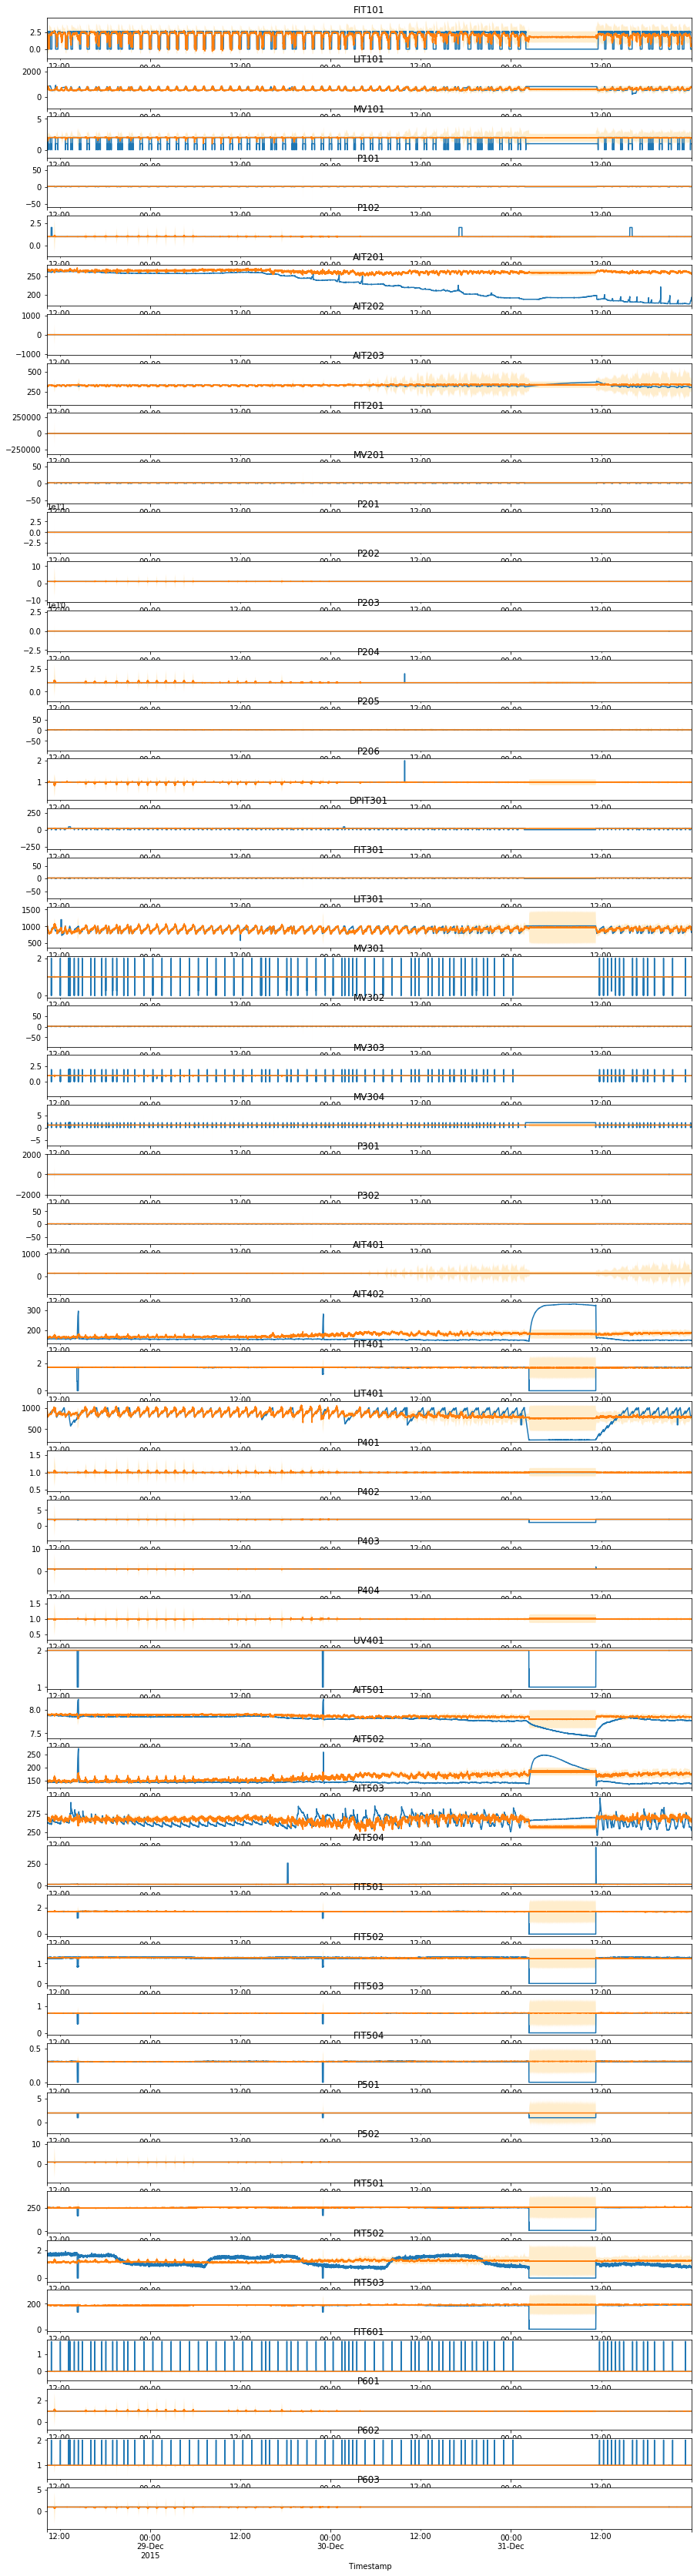

In [10]:
#define number of rows and columns for subplots
nrow=51
ncol=1
 
columns_list = data.columns

time_start = '2015-11-27'
time_end = '2015-12-31'
fig, axes = plt.subplots(nrow, ncol, figsize=(15,60))

# plot counter
count=0

for r in range(nrow):
    for c in range(ncol):
        data[columns_list[count]][time_start:time_end].plot(ax=axes[r])
        mu_x[columns_list[count]][time_start:time_end].plot(ax=axes[r])
        axes[r].fill_between(data[columns_list[count]][time_start:time_end].index,
                         th_up[columns_list[count]][time_start:time_end],
                         th_down[columns_list[count]][time_start:time_end],
                         facecolor='orange', alpha=0.2, interpolate=True)
        axes[r].set_title(columns_list[count])
        count+=1

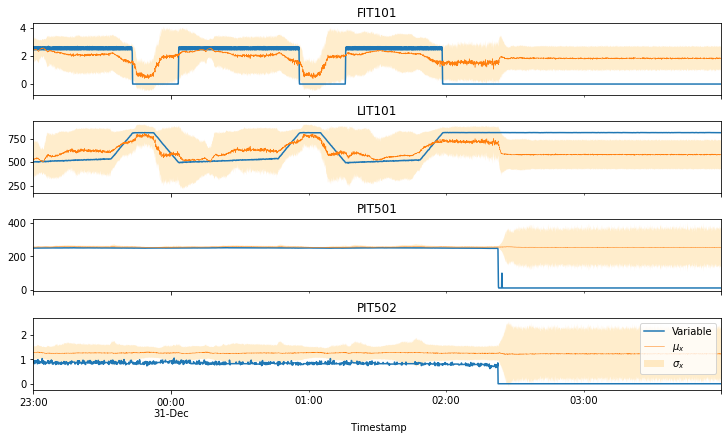

In [20]:
#define number of rows and columns for subplots
nrow=4
ncol=1
 
columns_list = data.columns

time_start = '2015-12-30 23'
time_end = '2015-12-31 03'
fig, axes = plt.subplots(nrow, ncol, figsize=(10, 6), sharex=True, constrained_layout=True)

# plot counter
count=0

for r, count in enumerate([0, 1, 44, 45]):
    for c in range(ncol):
        data[columns_list[count]][time_start:time_end].plot(ax=axes[r])
        mu_x[columns_list[count]][time_start:time_end].plot(ax=axes[r], linewidth=0.5)
        axes[r].fill_between(data[columns_list[count]][time_start:time_end].index,
                         th_up[columns_list[count]][time_start:time_end],
                         th_down[columns_list[count]][time_start:time_end],
                         facecolor='orange', alpha=0.2, interpolate=True)
        axes[r].set_title(columns_list[count])
        count+=1
plt.legend(['Variable', r'$\mu_x$', r'$\sigma_x$'])